# Solution Exponential Integrate and Fire Neuron

first name: Dylan

last name: Bourgeois

sciper: 224797

date: 18/03/2017

*Your teammate*

first name of your teammate: Tristan

last name of your teammate: Besson

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex3_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

<http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/exponential-integrate-and-fire.html>

In [41]:
import numpy as np

## Exercise 3, getting started

creating /var/folders/2c/1xd7j_293lq540jy20jzl8n00000gn/T/scipy-Dylan-h0b2FB/python27_intermediate/compiler_0e11f4ab1654172d7e2549ded7d81674
nr of spikes: 7


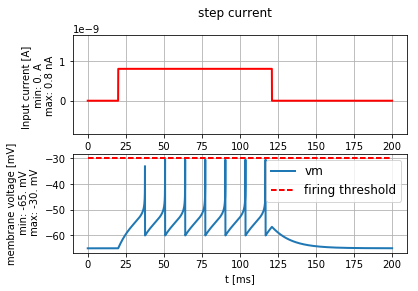

In [1]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.1 Rehobase Threshold

> Modify the code example given above: Call simulate_exponential_IF_neuron() and set the function parameter v_spike=+10mV (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated?

The Exponential Integrate and Fire is given by equation (5.6) of the book  :

(1) $$ \tau \frac{du}{dt} = -(u-u_{rest}) + \Delta_T . exp^{\frac{u-v_{rh}}{\Delta_T}} + R.I $$

Which yields the following solution (2) : $u(t) = u_{rest} + R.I_{rh} (1-\exp^{-\frac{(t-t_0)}{\tau}})$

To get the interval between two spikes we solve (2) for T with $u(T) = v_{reset}$ and $t_0 = 0$ yields :

$$T=\tau . ln(\frac{RI_{rh}}{RI_{rh} - (v(T) - v_{rest})})$$

In [110]:
V_rh = exp_IF.MEMBRANE_RESISTANCE_R * I_rh
T = exp_IF.MEMBRANE_TIME_SCALE_tau * np.log((V_rh)/(V_rh - (exp_IF.FIRING_THRESHOLD_v_spike - exp_IF.V_REST)))
print(T)

WARNING    /Users/Dylan/anaconda/envs/bmnn/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app
 [py.warnings]


nan s


In [111]:
print("Expected number of spikes : {}".format((200 * b2.ms)/T))

Expected number of spikes : nan


In [103]:
exp_IF.FIRING_THRESHOLD_v_spike = 10 * b2.mvolt

> Compute the minimal amplitude I_rh of a constant input current such that the neuron will elicit a spike

The minimal amplitude is given by finding the fixed point of ```f(u)``` or in other words finding the zeros of ```du/dt```. We know this fixed point is at ```v_rh``` (function parameter : ```exp_IF.RHEOBASE_THRESHOLD_v_rh```), which gives us the constant current : 

$$
I_{rh}^{min} = \frac{(v_{rh} - v_{rest})}{R_{membrane}}
$$

Note that ```v_rh - v_rest = v_spike``` as set in question 3.1.1.a (v_spike = +10mV)

In [112]:
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF

I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST) / exp_IF.MEMBRANE_RESISTANCE_R
print(I_rh)

0.5 nA


nr of spikes: 5


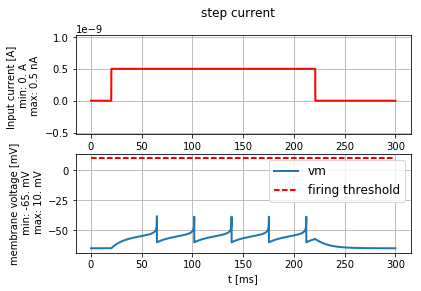

In [113]:
% matplotlib inline
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

# code here: 
# inject a current for 200ms. Set the maximal amplitude such that the neuron does NOT spike.
# plot the current and the voltage.
input_current = input_factory.get_step_current(
    t_start=20, t_end=220, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=300*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

> Modify the code given above and inject a current of amplitude I_rh and 300 ms duration into the expIF neuron.

nr of spikes: 8


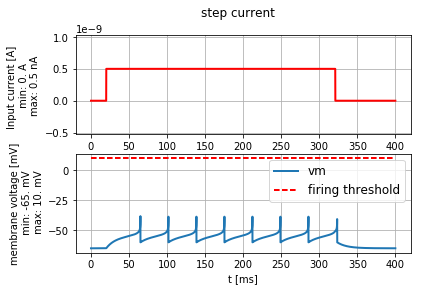

In [39]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=400*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.2 Strength - Duration Curve

nr of spikes: 1


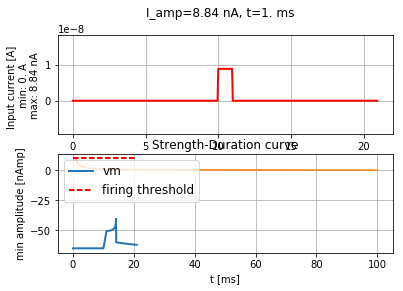

In [150]:
i=0  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.84, 4.42, 1.77, 1.10, .70, .48, 0.24]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

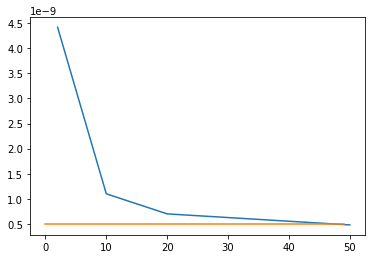

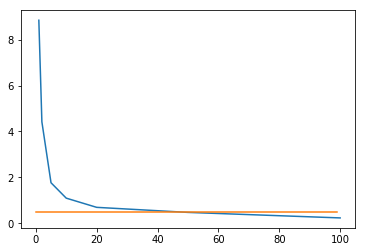

In [151]:
known_durations = [2, 10, 20, 50]
known_min_amp = [4.42 * b2.namp, 1.10* b2.namp, .70* b2.namp, .48* b2.namp]

plt.plot(known_durations, known_min_amp)
plt.plot([I_rh]*50) # rheobase
plt.show()

plt.plot(durations, min_amp)
plt.plot([0.5]*100) # rheobase
plt.show()

### 3.2 Discussion of the strength-duration curve
Describe your observations here


## 3.3 Quadratic Integrate and Fire neuron
This exercise is not available online. All information is given here.

### 3.3.1 Read the book chapter about the quadratic integrate and fire neuron
http://neuronaldynamics.epfl.ch/online/Ch5.S3.html

### 3.3.2 Implement the quadratic integrate and fire neuron in Brian2:

* Follow the [source]-link in the documentation to get the Python source code of the exponential integrate and fire neuron. http://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html
* Find the one function that implements the exponential LIF. Copy that function into this notebook. Rename the function, change it's parameters and modify the dynamics from the exponential to the quadratic equation (Equation 5.16 in the book).

The equation $5.16$ in the book gives the quadratic integrate and fire neuron model : 

$$ 
\tau . \frac{du}{dt} = a_0 . (u-u_{rest}) . (u-u_c) + R.I
$$

This is the equation we will implement below. It contains 2 new variables compared to the Exponential Integrate and Fire model shown in 3.1 :

* $a_0$ (denoted as ```A_0``` in the code) : positive constant [$V^{-1}$] 
* $v_c$ (denoted as ```SPIKE_INIT_THRESHOLD_v_crit``` in the code) : critical voltage for spike initiation by a short current pulse [$V$]

In [173]:
# default values. These are the same as the Exponential IF model
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# Custom values for quadratic IF model
SPIKE_INIT_THRESHOLD_v_crit = -55.0 * b2.mvolt
A_0 = 1./ (2 * SHARPNESS_delta_T)

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV


def simulate_quadratic_IF_neuron(
        tau=MEMBRANE_TIME_SCALE_tau,
        R=MEMBRANE_RESISTANCE_R,
        v_rest=V_REST,
        v_reset=V_RESET,
        v_rheobase=RHEOBASE_THRESHOLD_v_rh,
        v_spike=FIRING_THRESHOLD_v_spike,
        v_crit=SPIKE_INIT_THRESHOLD_v_crit,
        a_0=A_0,
        delta_T=SHARPNESS_delta_T,
        I_stim=input_factory.get_zero_current(),
        simulation_time=200 * b2.ms):
    """
    Implements the dynamics of the quadratic Integrate-and-fire model

    Args:
        tau (Quantity): Membrane time constant
        R (Quantity): Membrane resistance
        v_rest (Quantity): Resting potential
        v_reset (Quantity): Reset value (vm after spike)
        v_rheobase (Quantity): Rheobase threshold
        v_spike (Quantity) : voltage threshold for the spike condition
        v_crit (Quantity) : critical voltage for spike initiation by a short current pulse
        a_0 (Quantity) : Quadratic IF model constant
        delta_T (Quantity): Sharpness of the exponential term
        I_stim (TimedArray): Input current
        simulation_time (Quantity): Duration for which the model is simulated

    Returns:
        (voltage_monitor, spike_monitor):
        A b2.StateMonitor for the variable "v" and a b2.SpikeMonitor
    """

    eqs = """
    dv/dt = (a_0 * (v-v_rest)*(v-v_crit) + R * I_stim(t,i)) / (tau) : volt
    """
    neuron = b2.NeuronGroup(1, model=eqs, reset="v=v_reset", threshold="v>v_spike", method="euler")
    neuron.v = v_rest
    # monitoring membrane potential of neuron and injecting current
    voltage_monitor = b2.StateMonitor(neuron, ["v"], record=True)
    spike_monitor = b2.SpikeMonitor(neuron)

    # run the simulation
    net = b2.Network(neuron, voltage_monitor, spike_monitor)
    net.run(simulation_time)

    return voltage_monitor, spike_monitor

### 3.3.3 Call your function: 
As above, inject a current into your neuron and plot the response.

nr of spikes: 4


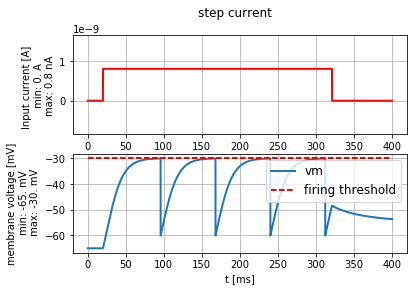

In [170]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = simulate_quadratic_IF_neuron(
    I_stim=input_current, simulation_time=400*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=FIRING_THRESHOLD_v_spike)

print("nr of spikes: {}".format(spike_monitor.count[0]))

### 3.3.4 Approximate the exponential model
* The quadratic model has three parameters: a0, v_rest and vc (note that this v_rest is different from the v_rest of the exponential model). They can be chosen such that the quadratic model approximates the exponential model. Read the box "Example: Approximating the exponential integrate-and-fire" in chapter http://neuronaldynamics.epfl.ch/online/Ch5.S3.html and make sure you understand figure 5.8.
* On paper, find the equations that express the parameters a0, v_rest and vc (in terms of the parameters of the exponential model) such that the two models are matched (in value, slope and curvature) at the rheobase threshold.
* In code, compute the values of a0, v_rest and vc using the values provided in the exp_IF module.

In [171]:
# 3.3.4 Approximate the exponential model (solve it on paper, use the final expressions here)

A_0 = 1./ (2 * exp_IF.SHARPNESS_delta_T)
print(A_0)
V_rest = 123 * b2.mV # replace this expression with the correct formula.
print(V_rest)
V_C = exp_IF.V_REST + 0.*b2.mV  # replace this expression with the correct formula.
print(V_C)

1. mV
123. mV
-65. mV


### 3.3.5 Simulate the quadratic- and the exponential model
* Inject the same current into an exponential- and into your (matched) quadratic model. Set the current duration to 1 second and the amplitude to I_Rh + 0.030 * b2.namp  (I_Rh as computed in exercise 3.1). Simulate for 1 second and plot the voltage responses.

In [ ]:
# 3.3.5 Simulate the quadratic- and the exponential model

# your code goes here. Use the parameters A_0 V_rest and V_C computed in 3.3.4

### 3.3.6 Discuss your observation

Explain your observations here. Qualitatively compare the voltage traces of the exponential- and the quadratic model. Is the number of spikes the same for the two models?